# Табличные данные и взаимодействие с Excel

Материалы:
* Макрушин С.В. Лекция "Табличные данные и взаимодействие с Excel"
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.org/github/pybokeh/jupyter_notebooks/blob/main/xlwings/Excel_Formatting.ipynb
* https://xlsxwriter.readthedocs.io/
* https://xlsxwriter.readthedocs.io/example_conditional_format.html
* https://ru.excelfunctions.eu/
* https://docs.python.org/3/library/csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot
* https://analysistabs.com/excel-vba/colorindex/

## Задачи для совместного разбора

In [21]:
import xlsxwriter
import xlwings as xw
import numpy as np

1. Создать файл `demo.xlsx` при помощи пакета `xlswriter` на основе данных из файла `costs.csv`.

In [27]:
import csv

In [28]:
with open('costs.csv', 'r', encoding = 'utf-8') as fp:
    reader = csv.reader(fp, delimiter ='\t')
    #for row in reader:
    #   print(row)
    data = list(reader)
data

[['',
  'Вода',
  'Пшеничная мука',
  'Дрожжи',
  'Сахар',
  'Соль',
  'Куркума молотая',
  'Топленное масло'],
 ['Хлеб Венгерский', '0.2', '0.4', '0.02', '0.02', '0.01', '0.005', '0.1'],
 ['Хлеб "Барбари"', '0.07', '0.25', '0.01', '0.06', '0.015', '0.1', '0.06'],
 ['Багет парижский',
  '0.12',
  '0.22',
  '0.005',
  '0.12',
  '0.009',
  '0.005',
  '0.05'],
 ['Чиабатта', '0.12', '0.23', '0.01', '0.01', '0.015', '0.05', '0.05'],
 ['Цена ресурсов', '7', '10', '184', '19', '7', '290', '105']]

In [29]:
workbook = xlsxwriter.Workbook('demo.xlsx')
worksheet = workbook.add_worksheet('Рецепты')

# ....
bold = workbook.add_format({"bold" : True, 'bg_color': '#aa00aa'})

for row_idx, row in enumerate(data):
    for col_idx, col in enumerate(row):
        worksheet.write(row_idx, col_idx, col, bold)
workbook.close()

2. На листе "Рецептура" файла `demo.xlsx` рассчитать себестоимость всех видов продукции. Результаты расчетов сохранить в отдельном столбце.

In [46]:
workbook = xw.Book("demo.xlsx")
worksheet = workbook.sheets('Рецепты')

In [47]:
worksheet.range('B10').value = 'werwer'
worksheet.range('B10').value = data

In [32]:
import numpy as np
data_arr = worksheet.range("B2:H5").options(np.array).value.astype(float)
worksheet.range("B2:H5").value = data_arr

In [33]:
worksheet.range('J2:J6').formula = \
    '=SUM(B2:H2)'


3. Выполнить 2 с помощью "протягиваемых" формул.

In [34]:
worksheet.range('J2:J6').formula = \
    '=SUM(B2:H2)'


4. Добавить общий заголовок и доработать форматирование новых столбцов

In [10]:
worksheet.range('J2:J6').color = (255, 255, 0)

In [11]:
worksheet.range('J2:J6').api.Font.Bold = True
#worksheet.range('J2:J6').api.Font.ColorIndex = 10

## Лабораторная работа 4

1. При помощи пакета `xlsxwriter` создайте рабочую книгу под названием `recipes_model.xlsx`. 
Добавьте лист с названием "Модель". В первой строчке листа разместите следующие названия колонок: `"Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"`.

* Не закрывайте рабочую книгу, она потребуется для выполнения следующего задания.

In [265]:
import xlsxwriter
import xlwings as xw
import numpy as np
import csv

In [266]:
workbook = xlsxwriter.Workbook('recipes_model.xlsx')
worksheet = workbook.add_worksheet('Модель')
data1 = ["Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", 
         "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"] 
for col_num, data in enumerate(data1):
    worksheet.write(0, col_num, data)
#worksheet.write('A1', 'Сущность') 
#worksheet.write('B1', 'Атрибут') 
#worksheet.write('C1', 'Тип данных') 
#worksheet.write('D1', 'Обязательно к заполнению') 
#worksheet.write('E1', 'Описание сущности') 
#worksheet.write('F1', 'Описание атрибута') 
#worksheet.write('G1', 'Ключ') 
#worksheet.write('H1', 'Таблица для ссылки') 
#worksheet.write('I1', 'Поле для ссылки') 
#worksheet.write('J1', 'SQL') 


2. При помощи пакета `xlsxwriter` добавьте условное форматирование на лист "Модель":
* если в ячейке столбца `G` указано значение "PK", то сделать заливку ячейки цвета  `#006600`, а цвет шрифта - `#fffff`.
* если в ячейке столбца `G` указано значение "FK", то сделать заливку ячейки цвета  `#cccc00`, а цвет шрифта - `#000000`.

Примените данные правила к диапазону `G2:G50`. Закройте рабочую книгу.

In [267]:
zaliv_1 = workbook.add_format({
    'bg_color': '#006600',
    'font_color': '#fffff'})
zaliv_2 = workbook.add_format({
    'bg_color': '#cccc00',
    'font_color': '#000000'})

worksheet.conditional_format('G2:G50', {'type':     'text',
                                       'criteria': 'containing',
                                       'value':    'PK',
                                       'format':   zaliv_1})

worksheet.conditional_format('G2:G50', {'type':     'text',
                                       'criteria': 'containing',
                                       'value':    'FK',
                                       'format':   zaliv_2})
workbook.close()

3. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [268]:
with open('recipes_model.csv', 'r', encoding = 'utf-8') as fp:
    reader = csv.reader(fp, delimiter = '\t')
    data = list(reader)
data


[['recipe',
  'name',
  'varchar(100)',
  'Y',
  'Рецепт',
  'Название рецепта',
  '',
  '',
  ''],
 ['recipe', 'id', 'serial', 'N', 'Рецепт', 'ID рецепта', 'PK', '', ''],
 ['recipe',
  'minutes',
  'int',
  'Y',
  'Рецепт',
  'Длительность выполнения в минутах',
  '',
  '',
  ''],
 ['recipe',
  'contributor_id',
  'int',
  'Y',
  'Рецепт',
  'ID автора рецепта',
  'FK',
  'user',
  'id'],
 ['recipe',
  'submitted',
  'timestamp',
  'Y',
  'Рецепт',
  'Дата добавления',
  '',
  '',
  ''],
 ['recipe',
  'n_steps',
  'int',
  'N',
  'Рецепт',
  'Кол-во шагов рецепта',
  '',
  '',
  ''],
 ['recipe',
  'description',
  'text',
  'N',
  'Рецепт',
  'Описание рецепта',
  '',
  '',
  ''],
 ['recipe',
  'n_ingredients',
  'int',
  'N',
  'Рецепт',
  'Кол-во ингредиентов в рецепта',
  '',
  '',
  ''],
 ['review', 'id', 'serial', 'Y', 'Отзыв', 'ID отзыва', 'PK', '', ''],
 ['review', 'user_id', 'int', 'Y', 'Отзыв', 'ID автора отзыва', 'FK', '', ''],
 ['review',
  'recipe_id',
  'int',
  'Y',
  'О

In [269]:
ws = xw.Book('recipes_model.xlsx').sheets("Модель")
ws.range("A2").value = data

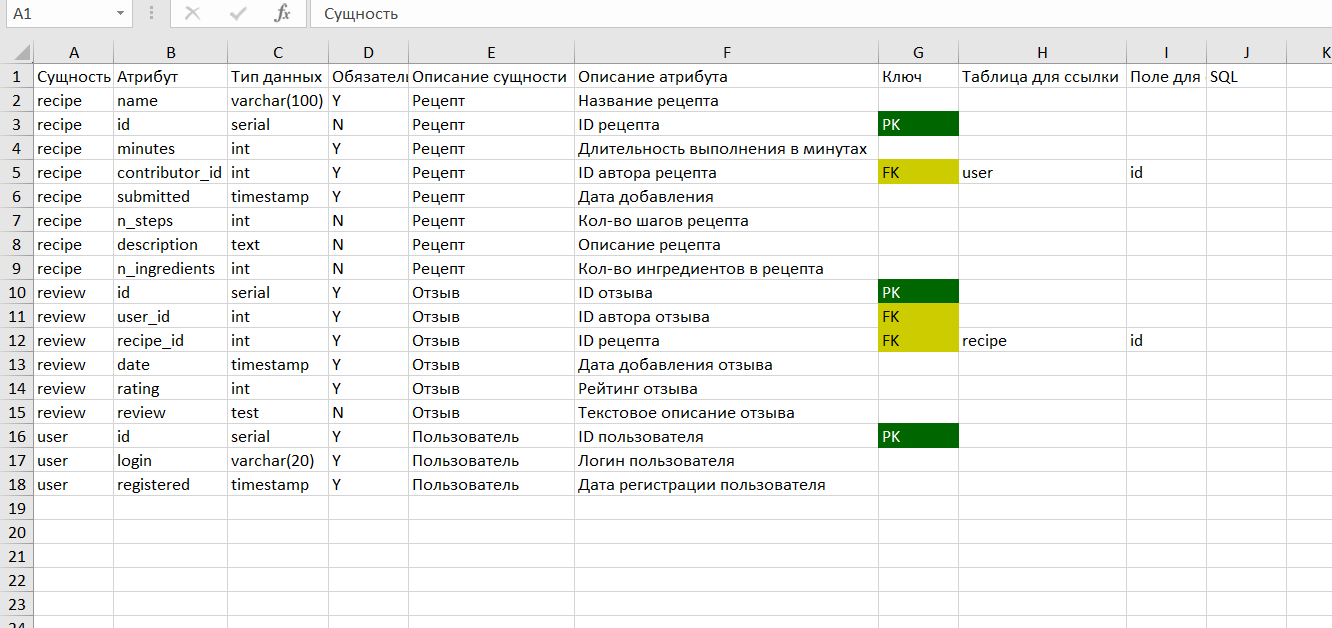

4. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [270]:
ws.range('J2:J18').formula = \
    '=CONCAT(CONCAT(B2," ",UPPER(C2))," ", IF(G2="PK","PRIMARY KEY",IF(G2="FK","REFERENCES","")), " ",IF(TYPE(H2)=2,CONCAT(H2,"(",I2,") "),""), IF(AND((D2="Y"),(G2<>"PK")),"NOT NULL",""))'

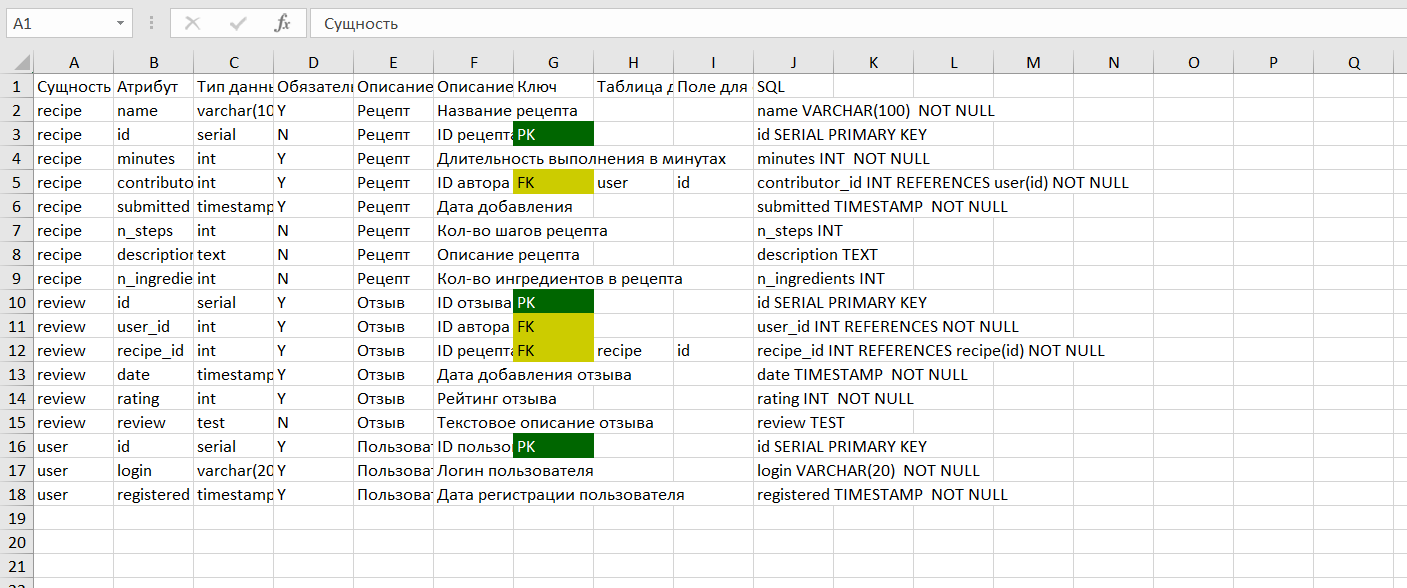

5. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [271]:
ws.range('A1:J1').color = (0, 204, 255)
ws.autofit(axis="columns")
ws.range('A1:J1').api.Font.Bold = True
ws.api.Range('A1:J18').AutoFilter(1)

True

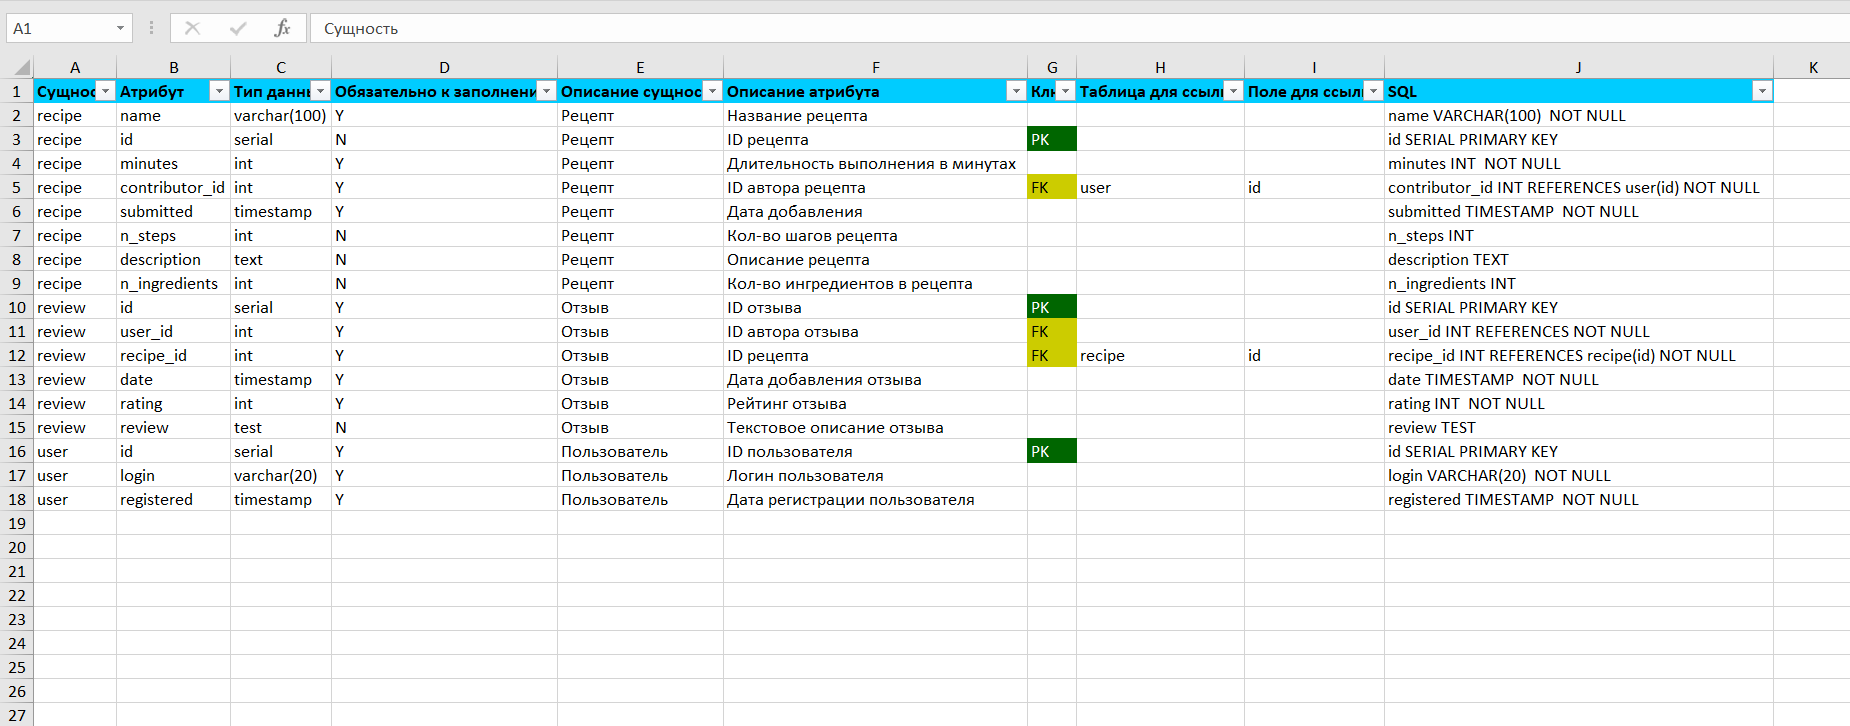

6. В данных, полученных из файла `recipes_model.csv`, имеются ошибки двух видов:

    1\. Для некоторых полей, указанных как первичный ключ, в столбце "Обязательно к заполнению" стоит значение "N";

    2\. Для некоторых полей, указанных как внешний ключ, не указана таблица для ссылки и поле для ссылки.

Получите данные из листа в виде `pd.DataFrame`. Найдите строки на листе, которые содержат ошибки первого или второго рода и сделайте заливку эти строк цвета `(255, 102, 102)`. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [272]:
import pandas as pd

In [273]:
dd = pd.read_excel('C:\\Users\\-\\Downloads\\B6772C60.xlsx')#файл является небезопасным поэтому автоматически выбирает такое название
                                                            #честно не знаю с чем это связано
dd

,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
0,recipe,name,varchar(100),Y,Рецепт,Название рецепта,NaN,NaN,NaN,name VARCHAR(100) NOT NULL
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,NaN,NaN,id SERIAL PRIMARY KEY
2,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,NaN,NaN,NaN,minutes INT NOT NULL
3,recipe,contributor_id,int,Y,Рецепт,ID автора рецепта,FK,user,id,contributor_id INT REFERENCES user(id) NOT NULL
4,recipe,submitted,timestamp,Y,Рецепт,Дата добавления,NaN,NaN,NaN,submitted TIMESTAMP NOT NULL
5,recipe,n_steps,int,N,Рецепт,Кол-во шагов рецепта,NaN,NaN,NaN,n_steps INT
6,recipe,description,text,N,Рецепт,Описание рецепта,NaN,NaN,NaN,description TEXT
7,recipe,n_ingredients,int,N,Рецепт,Кол-во ингредиентов в рецепта,NaN,NaN,NaN,n_ingredients INT
8,review,id,serial,Y,Отзыв,ID отзыва,PK,NaN,NaN,id SERIAL PRIMARY KEY
9,review,user_id,int,Y,Отзыв,ID автора отзыва,FK,NaN,NaN,user_id INT REFERENCES NOT NULL


In [274]:
PK = dd[dd['Ключ']=='PK']
p = PK[PK['Обязательно к заполнению']=="N"]
print('Индекс строки:',p.index[0])
p

Индекс строки: 1


,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,NaN,NaN,id SERIAL PRIMARY KEY


In [275]:
ws.range('A3:J3').color = (255, 102, 102)

In [276]:
FK = dd[dd['Ключ']=='FK']
ts = FK[pd.isnull(FK['Таблица для ссылки']) == True]
t = ts[pd.isnull(ts['Поле для ссылки']) == True]
print('Индекс строки:',t.index[0])
t

Индекс строки: 9


,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
9,review,user_id,int,Y,Отзыв,ID автора отзыва,FK,NaN,NaN,user_id INT REFERENCES NOT NULL


In [277]:
ws.range('A11:J11').color = (255, 102, 102)

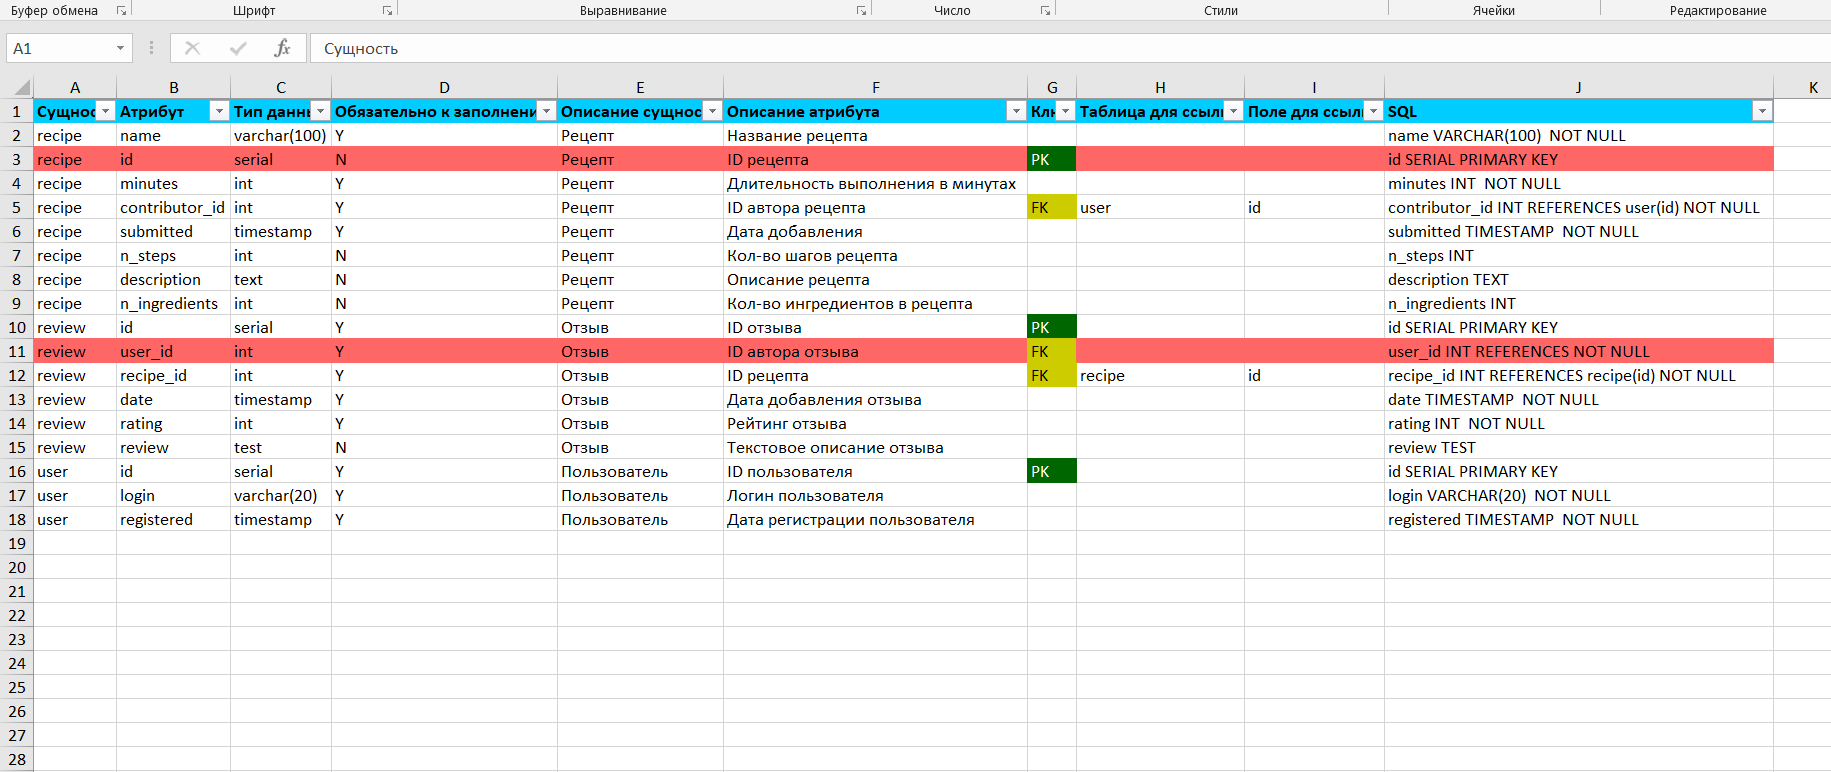

7. При помощи пакета `xlwings` создайте лист с названием `Ошибки заполнения`. 

Поместите в первой строчке этого листа заголовки "№ строки" и "Ошибка". Заполните лист на основе решения задачи 6. В столбце "№ строки" укажите номер строки с листа `Модель`, содержащую ошибку, а в столбце "Ошибка" для ошибок первого рода напишите сообщение "Первичный ключ не может быть NULL", для ошибок второго рода - "Не указано поле для связи по внешнему ключу". Сделайте скриншот состояния листа `Ошибки заполнения` и прикрепите в ячейку ноутбука. 

In [278]:
wb = xw.Book('recipes_model.xlsx')
os = wb.sheets.add('Ошибки заполнения')

In [279]:
os.range('A1').value = '№ строки'
os.range('B1').value = 'Ошибка'
os.range('A2').formula = \
        '=ROW(Модель!A3)'
os.range('A3').formula = \
        '=ROW(Модель!A11)'
os.range('B2').value = 'Первичный ключ не может быть NULL'
os.range('B3').value = 'Не указано поле для связи по внешнему ключу'

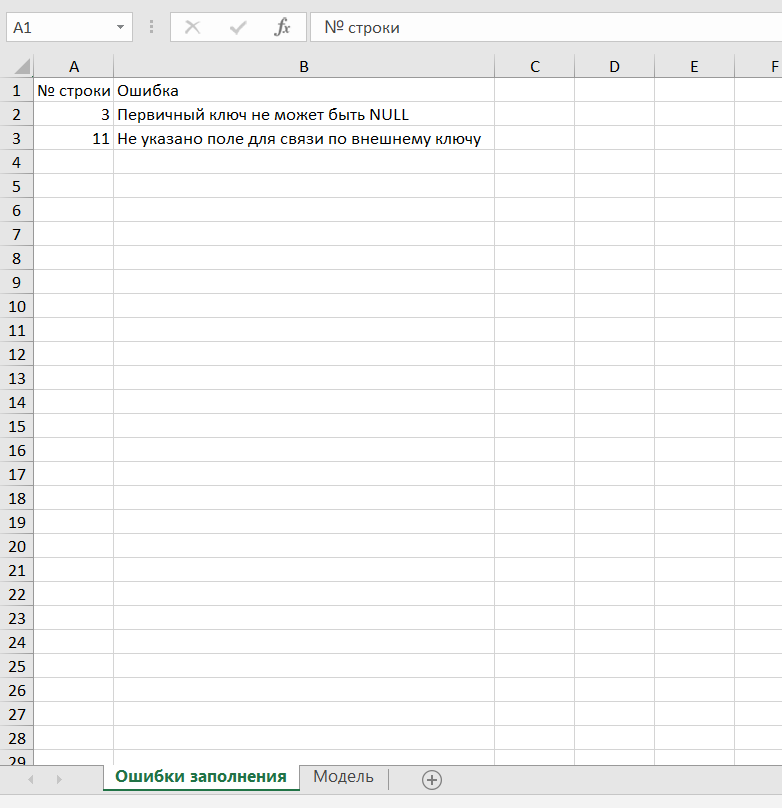

8. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [280]:
at = dd.groupby('Сущность')['Атрибут'].count()
at = pd.DataFrame(at)
print(at)
at_idx = at.index
at2 = np.array(at['Атрибут'])
at_idx[1]

          Атрибут
Сущность         
recipe          8
review          6
user            3


'review'

In [281]:
wb = xw.Book('recipes_model.xlsx')
ss = wb.sheets.add('Статистика')

In [282]:
ss.range('A1').value = at_idx[0]
ss.range('A2').value = at_idx[1]
ss.range('A3').value = at_idx[2]
ss.range('B1').value = at2[0]
ss.range('B2').value = at2[1]
ss.range('B3').value = at2[2]

In [283]:
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference

In [284]:
a = []
b = []
for i,j in zip(at_idx, at2):
    a.append(i)
    b.append(j)

data = [a,b]
data

[['recipe', 'review', 'user'], [8, 6, 3]]

In [285]:
data1 = pd.DataFrame(at)

In [286]:
import matplotlib.pyplot as plt

In [287]:
x = ['recipe', 'review', 'user']
y = [8,6,3]

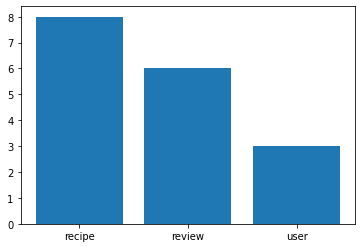

In [288]:
f = plt.bar(x, y)

In [289]:
workbook = xlsxwriter.Workbook('recipes_model.xlsx')
chart1 = workbook.add_chart({'type': 'bar'})
chart1.add_series({
    'categories': '=Cтатистика !$A$1:$A$3',
    'values':     '=Cтатистика !$B$1:$B$3',
})

C:\Users\-\Downloads\anaconda\lib\site-packages\xlsxwriter\chart.py:835: UserWarning: Sheetname in '=Cтатистика !$B$1:$B$3' contains spaces but isn't quoted. This may cause errors in Excel.
  warn("Sheetname in '%s' contains spaces but isn't quoted. "
C:\Users\-\Downloads\anaconda\lib\site-packages\xlsxwriter\chart.py:835: UserWarning: Sheetname in '=Cтатистика !$A$1:$A$3' contains spaces but isn't quoted. This may cause errors in Excel.
  warn("Sheetname in '%s' contains spaces but isn't quoted. "


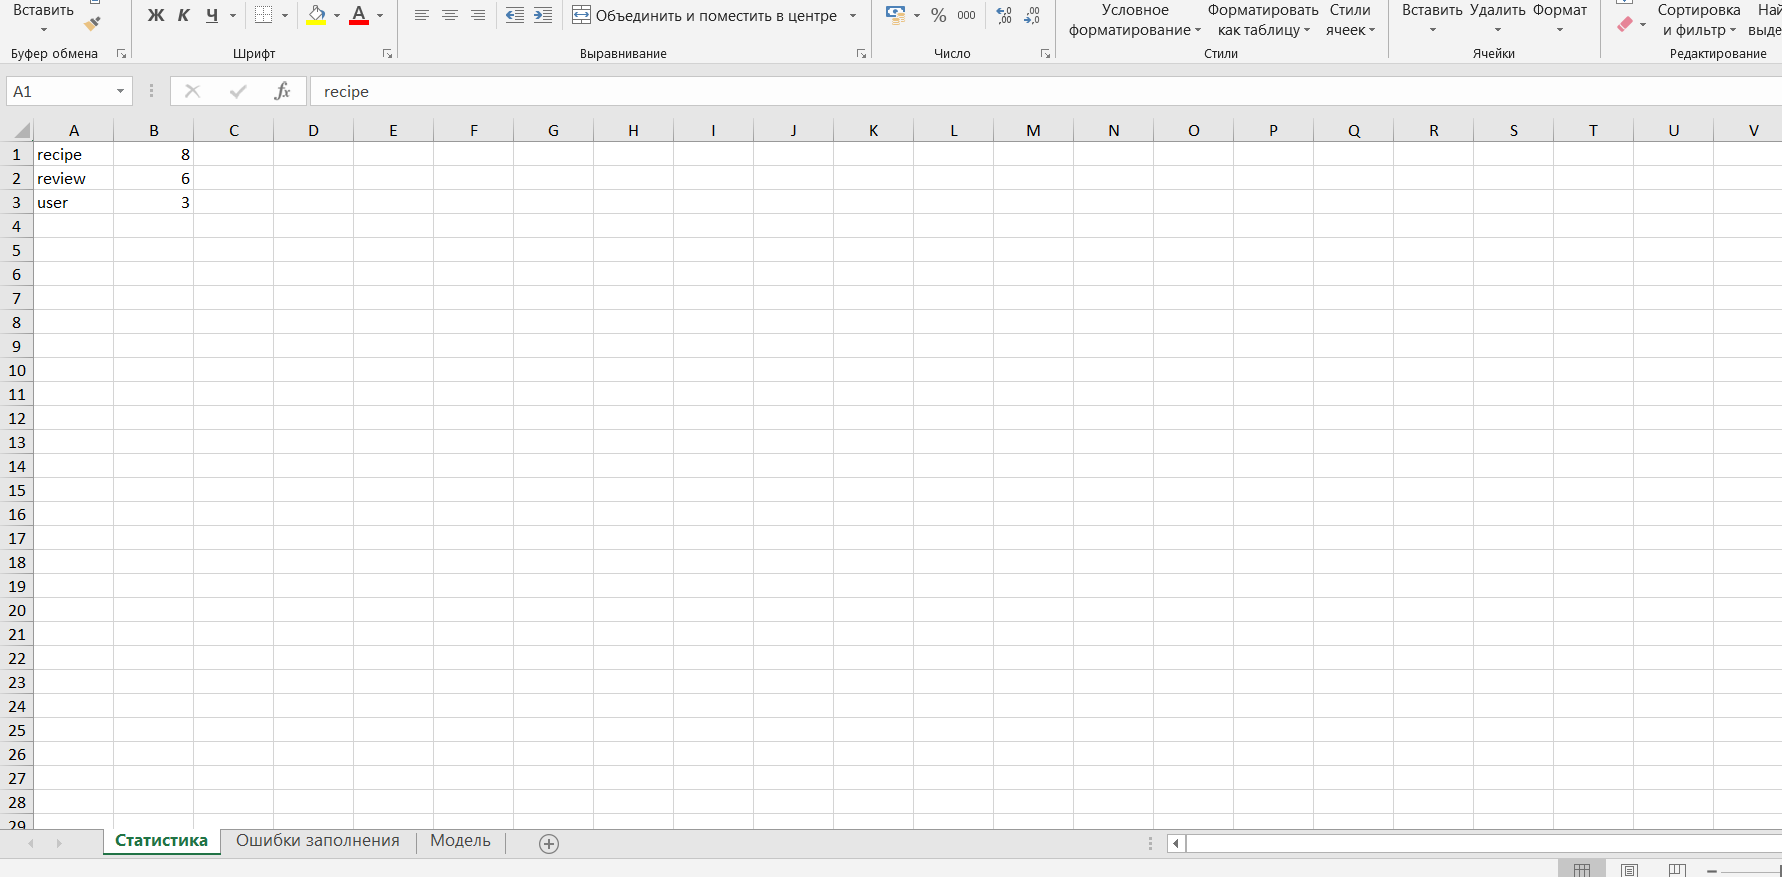